Walkthrough video: https://youtu.be/64Duu1hyXLo

Introduction:
The basis for our code comes from David Pollard's 1982 paper, A simple ice sheet model yields realistic 100 glacial cycles. Pollard wanted to build of the previous work of Birchfield et al. and Oerlemans in order to produce an accurate model of the 100 kyr ice cycle. Pollard's goal was to create a model that that would closely follow the records of ice volume in glaciers for the past 700 kyr. Pollard's model differs from other previous models in the fact that it takes into account both topography and possible calving. These additions led to a model that matched the 700 kyr records more closely than any other model up to that point in time. It's important that scientists try to get their models to closely follow past data, because it means that said models will likely be more accurate in predicting the future. Glaciers are an incredibly important part of the earth’s climate system, and as global temperatures rise it has become clear that glaciers are shrinking at an alarming rate. The ability to accurately model glaciers is more important now than ever due to the effects of climate change. The main numerical method used in the paper is the Newton-Raphson method, which is applied to two equations separately. Similar studies have been done to model the glacial cycles.  A study by Chris Zweck in 2005 used an equation with more parameters, such as rock heat capacity or a sliding parameter and produced a similar result.  Another study has a model of glacial cycles with sea level rise as a stronger parameter. The models of sea level and glacial volume show similar trend with that of the models from our basis study. These factors being considered in our basis study, while making the equations more complex, would likely bring a higher level of accuracy to the models and could be implemented in future studies. 

Equations: 
Northern hemisphere glacial cycles are quite complex and depend on quite a lot of variables. From historical records it can be observed that there is a dominant cycle of glacial ice volume that occurs over an 100 kyr period. The main equation used by Pollard is a simplified diffusion equation for ice thickness which is as follows:

$$\frac{\partial h}{\partial t} = A \frac{\partial}{\partial x}\left[h^{\alpha} \left|\frac{\partial (h + h')}{\partial x}\right|^{\beta} \frac{\partial (h + h')}{\partial x}\right] + G(h + h', x, \text{orbit})$$

This is quite a long formula, but once each term is defined it becomes much easier to understand. The variable t is time while x is the distance from north to south. h' is defined as the elevation of the bedrock surface above a fixed point, which in this case is the mean sea level from 1982. This formula is also made up of some constants, A is one such constant that is equal to 5.77e-4 1/m^3*yr. Alpha and beta are also constants, equal to 5 and 2 respectively. The northern boundary of the model is 74° N while the southern boundary is taken to be 30° N. At these points h = 0 which is to prevent ice formation in the arctic and tropics. G is the net annual mass balance on the ice surface and is dependent on a separate set of equations from Oerlemans(SITE): 

$$
G = \begin{cases}
a(h + h' - E) - b(h + h' - E)^2 & \text{if } h + h' - E \leq 1{,}500 \text{ m} \\
0.56 & \text{if } h + h' - E > 1{,}500 \text{ m}
\end{cases} \text{ m yr}^{-1}
$$



This equation also is built upon some constants that can be modified to change the outcome, being a and b. a is equal to 0.81 * 10^-3 1/yr, while b is 0.30 * 10^-6 1/m*yr according to the paper; however, we found that in our model these values don't work. As such, we experimented with different values until we found some that would allow for proper results. E is the equilibrium altitude, and is the value that controls the value of G. E has a constant slope and is dependent on its own equation E = E0(x) + k * dQ. E0 is the present equilibrium line and dQ is the difference in the summer half year insolation from 55° N from the present, which in this case is 1982. K is the isolation sensitivity and like E0, is a value that is changed each run to yield different results.

There is a third main equation that is used in this one-dimensional model, and this equation is related to the change in bedrock due to the change in ice load. The Pollard states that at the time of the paper there wasn’t a consensus on what kind of model would be best for this, so he chose to use a “thin-channel model”. The equation is as follows:

$$\frac{\partial h'}{\partial t} = \nu \frac{\partial^2}{\partial x^2}[h' - h'_0(x) + rh]$$

This equation seems to be quite simple; however, the "v" term in the equation is itself quite complicated. V is equal to ρa * g * H^3 / Nη, with the simplest of these variables being g, the gravitational constant one the surface of earth. H is the mean thickness along a channel while η is the dynamic viscosity of said channel. N is either 3 or 12 depending on the requirements at the base of the lithosphere. r is the ratio of ice density (ρi) to rock density (ρa). h’0(x) is the surface topography that would occur without ice, and is the variable that determines the boundary conditions for this equation. Pollard chose to have h’ = h’0 such that the latitudinal bounds are 74° N and 30° N. 

The main variables that will be modified between each run are the parameters that Pollard modified, those being, E0, k, r, v, and h'0(x). The main limitation of these eqautions is that they only account for ice thickness running north to south. Pollard rectifies this by multiplying by an east-west ice sheet dimenstion of about 3000 km to compute the volume.

Numerical Methods:
After thinking about what numerical method would be best to use in this specific case, we eventually decided to use the Crank-Nicolson method. The original paper used the Newton-Raphson method which is root-finding algorithm for non-linear methods. We decided that the numerical method that we were going to use would be different in nature from the one used by the paper. We believed that this would give more interesting results that we would be able to compare to the original results in the paper. As such, we made the decision to use the Crank-Nicolson method which is time stepping method for solving PDEs (partial differential equations). This method is based around the idea that one can approximate future results by continuously solving systems of linear equations. These systems are represented in matrix form, meaning that matrix multiplication and inverses are key to properly using the Crank-Nicolson method. Below is a discretization of the typical diffusivity equation over space set equal to the discretization over time:

$$\frac{J_i^{k+1} - J_i^k}{\Delta t} = \Theta D\frac{J_{i+1}^{k+1} - 2J_i^{k+1} + J_{i-1}^{k+1}}{\Delta x^2} + (1-\Theta)D\frac{J_{i+1}^k - 2J_i^k + J_{i-1}^k}{\Delta x^2}$$

There are three options for the variable sigma, and the choice between 1, 0, and 0.5 determines the method which is being used. When 0.5 is chosen as sigma, we get the Crank-Nicolson method, and as such this is the sigma valued we selected. In order to create a marching equation that can be translated into vectors we move the k + 1 terms to one side of the equation. This isolates the terms that we’re solving for leads to the following marching equation: 

$$J_i^{k+1} - C_D\Theta(J_{i+1}^{k+1} - 2J_i^{k+1} + J_{i-1}^{k+1}) = J_i^k + C_D(1-\Theta)(J_{i+1}^k - 2J_i^k + J_{i-1}^k)$$

CD is a consolidation of all constants to make the make the math easier. From this previous equation we set sigma equal to 0.5 and rearrange terms to get the equation that we base our matrix math off of: 

$$-C_D\frac{1}{2}J_{i-1}^{k+1} + (1 + C_D)J_i^{k+1} - C_D\frac{1}{2}J_{i+1}^{k+1} = C_D\frac{1}{2}J_{i-1}^k + (1 - C_D)J_i^k + C_D\frac{1}{2}J_{i+1}^k$$


N by N matrices are built out of the constant terms on each side of the equation, with the left matrix being multiplied by a N by 1 matrix representing the J^k+1 terms. The right hand side is multiplied by the 1 by N matrix representing the J^k terms. Since the J^K+1 is what we are solving for, we multiply the right hand side (RHS) by the inverse of the N by N matrix on the left. This give us the matrix inverse problem which will be repeatedly solved in order to iterate over time and space.

In our case, we wanted to make the boundaries as easy to compute as possible, as such we elected to use Dirichlet boundary conditions. In the simplest terms possible, we first replace the RHS vector J1^K with the starting conditions, and replace the first row of the matrix with 1, 0, 0, ………. Without properly defining our boundary conditions the code will fail to run so It is imperative that every matrix created has the boundary conditions applied.

In [ ]:
# Setup (Imports and Variables)
# NOTE: All units of distance are in METERS
# 1 degree latiture ~= 111,000 m
# Since all h values are in meters, it is better to use meters instead of degrees when solving
# all relevant constant/intital values are stored in the values dictionary
# The code takes a couple of minutes to run, usually no more than 5 or 6
# The last graph is SUPPOSED to be numerically unstable to show how the simulation accuracy degrades as we increase the simulation time
# 


import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.sparse import diags

# Function to intialize all uniform strating variables based on the gridsize and timestep
def initialize(numberPoints, dt):

    values = {}

    values['n'] = numberPoints
    values['dt'] = dt # years

    values['alpha'] = 5
    values['beta'] = 2
    values['A'] = 5.77 * 10 ** -4
    values['lat_max'] = 74
    values['lat_min'] = 30

    values['a'] = 0.10 * 10 ** -3
    values['b'] = 0.03 * 10 ** -6
    values['r'] = 0.3
    values['k'] = 17
    values['nu'] = 100
    values['v'] = 100000 * 1000 # km2 / yr, converted to meters 

    values['dx'] = (74-30) / (numberPoints - 1)
    values['dx_m'] = values['dx'] * 111000


    values['lat'] = np.linspace(30, 74, numberPoints) # latitudes
    values['E0'] = 550 + 5 * (values['lat']-70) # from paper
    values["h_prime0"] = np.interp(values['lat'], np.array([30, 40, 66, 70, 74]), np.array([400, 400, 200, 850, -500])) #generating topography
    values['h'] = np.zeros(numberPoints) # inital h array
    values["h_prime"] = values["h_prime0"].copy() # intial h prime array
    return values


In [ ]:
def bedrockM (size, v): #Creating the matricies that will be used to solve equation 3, DOES NOT NEED TO BE CALLED MORE THAN ONCE
    arr_size = size
    cD = v['v'] * v['dt'] / v['dx_m'] ** 2 # constants
    #Left side matrix
    ML_Data = np.array([[-0.5*cD]*arr_size,[1+cD]*arr_size,[-0.5*cD]*arr_size])
    MLdiag = np.array([-1,0,1])
    ML = sp.sparse.spdiags(ML_Data, MLdiag, arr_size, arr_size).toarray()
    #Right Side matrix
    MR_Data = np.array([[0.5*cD]*arr_size,[1-cD]*arr_size,[0.5*cD]*arr_size])
    MRdiag = np.array([-1,0,1])
    MR = sp.sparse.spdiags(MR_Data, MRdiag, arr_size, arr_size).toarray()

    # Applying Dirichlet conditions to arrays
    # not sure why the entire row needs to be zero, had to look it up to get this function working, LOOK INTO THIS
    ML[0, :] = 0
    ML[0, 0] = 1
    MR[0, :] = 0
    MR[0, 0] = 1

    ML[arr_size-1, :] = 0
    ML[arr_size-1, arr_size-1] = 1
    MR[arr_size-1, :] = 0
    MR[arr_size-1, arr_size-1] = 1


    return ML, MR


In [ ]:
def massBal(h, h_prime, timestep, v):
    # multi-frequency forcing, simulates orbital forcing because it was too difficult to add
    dQ = 0.03 * (
    1.0*np.sin(2*np.pi*timestep/19000) +
    0.6*np.sin(2*np.pi*timestep/23000) +
    1.2*np.sin(2*np.pi*timestep/41000)
    )
    elevation = h + h_prime # total elevation = base + change
    G = np.zeros(len(elevation))
    E = v['E0'] + v['k'] * dQ

    # the mass balance value is either a constant or determined by a set of equations, depedning on the elevation value.
    for i in range(len(elevation)):
        if elevation[i] - E[i] <= 0:
            #equation
            G[i] = v['a'] * (elevation[i] - E[i]) - v['b'] * (elevation[i] - E[i]) ** 2
        elif elevation[i] - E[i] <= 1500:
            #equation
            value = v['a'] * (elevation[i] - E[i]) - v['b'] * (elevation[i] - E[i]) ** 2
            G[i] = max(value, 0.0) # CANNOT BE NEGATIVE
        else:
            #constant
            G[i] = 0.56
    return G


In [ ]:
def iceDensity(h, h_prime, v):
    noZeroMath = 1e-10 # prevents h and the gradient from being zero, cause that would cause a lot of problems 
    dx = v['dx_m']
    n = len(h)
    elevation = h + h_prime
    gradient = np.zeros(len(elevation))
    #creating a gradient array
    for i in range(1, n - 1):
        gradient[i] = (elevation[i + 1] - elevation[i-1]) / (2 * dx)
    
    # boundary conditions for gradient array
    gradient[0] = (elevation[1] - elevation[0]) / dx
    gradient[-1] = (elevation[-1] - elevation[-2]) / dx
    
    diffuse = v['A'] * (h + noZeroMath) ** v['alpha'] * (np.abs(gradient) + noZeroMath) ** v['beta']

    # Different way of creating the matricies than the bedrock due to the fact that we have to change them each timestep
    # we have to recalculate our "cD" each time
    # This is why this section is different from the bedrock section.

    # Creating diagonal base matricies with 3 diagonals
    lower = np.zeros(n - 1)
    mid = np.ones(n)
    upper = np.zeros(n - 1)
    
    for i in range(1, n-1):
        D_left = 0.5 * (diffuse[i-1] + diffuse[i])
        D_right = 0.5 * (diffuse[i] + diffuse[i+1])
        
        r_left = 0.5 * v['dt'] * D_left / dx ** 2
        r_right = 0.5 * v['dt'] * D_right / dx ** 2
        
        lower[i-1] = -r_left
        mid[i] = 1 + r_left + r_right
        upper[i] = -r_right


    # creating ML
    mid[0] = 1
    upper[0] = 0
    lower_full = np.zeros(n)
    lower_full[1:] = lower

    mid_full = mid

    upper_full = np.zeros(n)
    upper_full[:-1] = upper

    ML_Data = np.vstack([lower_full, mid_full, upper_full])
    MLdiag = np.array([-1,0,1])
    ML = sp.sparse.diags(ML_Data, MLdiag, shape=(n,n)).toarray() # the point at which the three diagonals are joined together to create the full array

    # Creating the right hand matrix, repeat the steps for ML except change the signs of the outside diagnoals and change the middle diagonal as well
    lower_MR = -lower
    mid_MR = 1 - (mid - 1)
    upper_MR = -upper
    

    lower_MR_full = np.zeros(n)
    lower_MR_full[1:] = lower_MR

    mid_MR_full = mid_MR


    upper_MR_full = np.zeros(n)
    upper_MR_full[:-1] = upper_MR
    MR_data = np.vstack([lower_MR_full, mid_MR_full, upper_MR_full])
    MRdiag = np.array([-1,0,1])
    MR = sp.sparse.diags(MR_data, MRdiag, shape=(n,n)).toarray()
    

    # Boundary condtions
    MR[0, :] = 0
    MR[0, 0] = 1
    
    return ML, MR

In [ ]:
def solveIceEquation(h, h_prime, v, time):
    ML_Ice, MR_Ice = iceDensity(h, h_prime, v) # calling ice density function
    G = massBal(h, h_prime, time, v) 
    RHS = MR_Ice @ h + v['dt'] * G # matrix math, creating RHS
    #boundary conditions 
    RHS[0] = 0
    RHS[-1] = RHS[-2]
    h_updated = np.linalg.inv(ML_Ice) @ RHS  # multiplying the inverse of the left side matrix with the RHS to solve for the future ice area
    h_updated = np.maximum(h_updated, 0.0)  # Ice can't be negative
    return h_updated


In [ ]:

def solveBedrock(h, h_prime, v):
    ML_Bedrock, MR_Bedrock = bedrockM(v['n'], v)
    temp_var = h_prime - v['h_prime0'] + v['r'] * h # makes matrix math easier than it would be otherwise, will icsolate out h_prime later
    # boundary conditions
    temp_var[0] = 0
    temp_var[-1] = 0
    temp_new = (np.linalg.inv(ML_Bedrock) @ MR_Bedrock @ temp_var) # matrix math, ML times RHS
    temp_new /= v['nu']
    # 
    final_hPrime = temp_new + v['h_prime0'] - v['r'] * h # isolating h_prime again after going through the calculations
    # boundary conditions
    final_hPrime[0] = v['h_prime0'][0]
    final_hPrime[-1] = v['h_prime0'][-1]
    return final_hPrime


In [ ]:
def MainLoop(v, years, save_int):
    # total number of years that will be simulated, not total years    
    n_years = int(years /v['dt'])

    # determining how often the code should save values, should match the timestep in most cases but useful to have them seperate
    save_interval = save_int

    numSave = int(n_years // save_interval) + 1

    # intitalizing results arrays and time
    results_h = np.zeros((numSave, v['n']))
    results_h_prime = np.zeros((numSave, v['n']))
    results_time = np.zeros(numSave)
    results_volume = np.zeros(numSave)
    results_area = np.zeros(numSave)

    current_time = 0.0
    save_index = 0

    # --- spin-up to equilibrium (no orbital forcing) --- This was taken from chat GPT after I was having trouble getting a spin up funciton to work
    for i in range(int((100000/v['dt']))):   # 2000 * dt (dt=50) = 100 kyr spin-up
        h_old = v['h'].copy()
        h_prime_old = v['h_prime'].copy()

        h_new = solveIceEquation(h_old, h_prime_old, v, time=0)  # no forcing
        h_avg = 0.5 * (h_old + h_new)
        h_prime_new = solveBedrock(h_avg, h_prime_old, v)

        v['h'] = h_new
        v['h_prime'] = h_prime_new

    # main loop, saving all the info from running the functions
    for step in range(n_years):
        current_time = step * v['dt']
        
        h_old = v['h'].copy() # copying the values we have now so we can overwrite them without any errors
        h_prime_old = v['h_prime'].copy()
        
        #creating new arrays!
        h_new = solveIceEquation(h_old, h_prime_old, v, current_time)
        
        h_avg = 0.5 * (h_old + h_new)
        
        h_prime_new = solveBedrock(h_avg, h_prime_old, v)
        
        v['h'] = h_new
        v['h_prime'] = h_prime_new
        

        # saving data based on the timestep the user provides
        if step % save_interval == 0:
            results_h[save_index, :] = v['h']
            results_h_prime[save_index, :] = v['h_prime']
            results_time[save_index] = current_time
            
            results_volume[save_index] = np.trapezoid(v['h'], dx=v['dx_m']) * (3000 / 1e6)  # from paper, gets total volume
            # compute cross-sectional area in m^2
            area_m2 = np.trapezoid(v['h'], dx=v['dx_m'])
            area_km2 = area_m2 / 1e6
            results_area[save_index] = area_km2

            save_index += 1

    # done! returns all results
    return {
        'h': results_h,
        'h_prime': results_h_prime,
        'time': results_time,
        'volume': results_volume,
        'area': results_area,
        'save': save_index
    }

Results:

Using the model, we ended up running four simulations to calculate the cross sectional area of glacial ice in km^2 over the period of 700000 years as well as two simulations where we kept the grid-size and timesteps the same as they were in the first plot, but increased the timescale to one million years and five million years respectively. We did this in order to see what effects grid-size and timestep have on the outputs as well as if running the model far beyond its intended time range will cause any errors. We found that generally as long as the timestep is less than the grid-size, then the simulation will output the expected result. The expected result is a oscillating graph in which there are major glacial cycles every 100,000 years or so with smaller fluctuations. This matches the results from Pollard’s paper, specifically the graph showing the glacial cross-sectional area. The output using a timestep of 90 years with a grid resolution of 20km seems to more closely match the graph in Pollard’s paper. When the timestep is larger than the grid spacing is when strange things begin to happen. No error is thrown, however there is a major spike at the beginning of the simulation. This specific timepoint records a value of 160000, which is so much larger than anything else recorded. The graph then appears to return to what it should look like, but we have yet to figure out what is causing this. We have two main hypotheses, the first and more likely one being that having a much larger timestep compared to grid resolution creates some kind of numerical instability that causes the massive jump at the beginning of the simulation. The second and less likely guess as to why this happens is because of the spin-up component of the main loop. This is less likely to be the case because it appears that the spike occurs after time zero, meaning it is likely not related to the spin-up component. 

When considering the case in which we try and use the model outside of its intended range, we find that adding a couple thousand years (three thousand) to the total time still allows the simulation to run. Adding a lot more time, say 4.3 million, leads to numerical instability and causes the graph to not output properly.

This model taught us a lot about the many processes that govern glacial cycles over a specified time period. We had never considered how many small processes were involved in system governing glacial cycles. We also learned a lot about the Crank-Nicolson method and how to apply it to a large-scale system. We became aware of the cycles that glacial ice follows, with large cycles about every 100,000 years with smaller cycles in-between.

In terms of model improvement, the biggest improvement that could be made is to change the topography used in the model. Every run of the model uses the same initial topography and implementing different topographies would be extremely useful in seeing how different areas of the earth affect glacial ice cycles. Another improvement that could be made is actually using gravity equations in the mass balance equation. I found them too difficult to implement in such a short time period and instead hard coded some trig functions that roughly emulate the results of solving for gravity equations. These functions are not exact though and the model would benefit from actual gravity equations.


Figures:

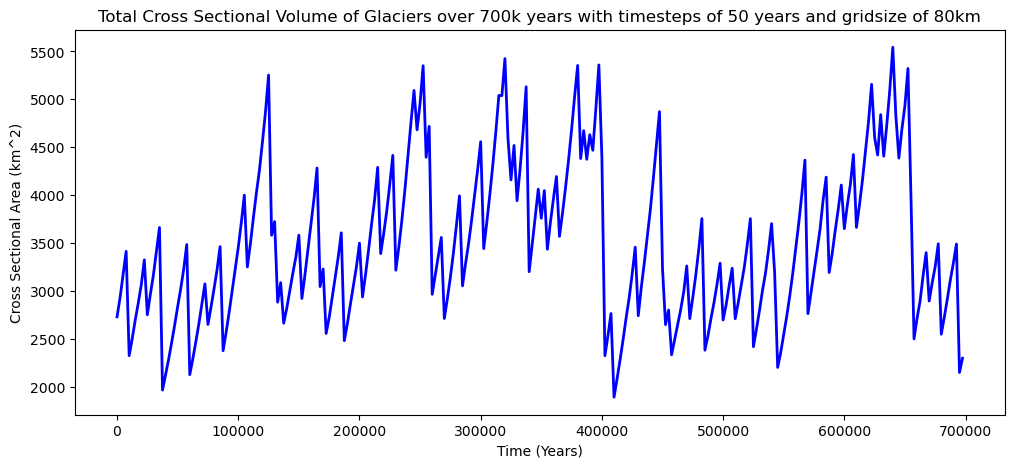

In [ ]:
# Showing ice cross seaction area with timesteps of 50 years and gridsize of 80
v1 = initialize(80, 50) # Test values from paper, 80 points and 50 year timesteps
result1 = MainLoop(v1, 700000, 50)
all_time1 = result1['time']
saves1 = result1['save']
areas1 = result1['area']
plt.figure(figsize=(12, 5))
plt.xlabel('Time (Years)')
plt.ylabel('Cross Sectional Area (km^2)')
plt.title('Total Cross Sectional Volume of Glaciers over 700k years with timesteps of 50 years and gridsize of 80')
plt.plot(all_time1[:saves1], areas1[:saves1], 'b-', linewidth=2)
plt.show()

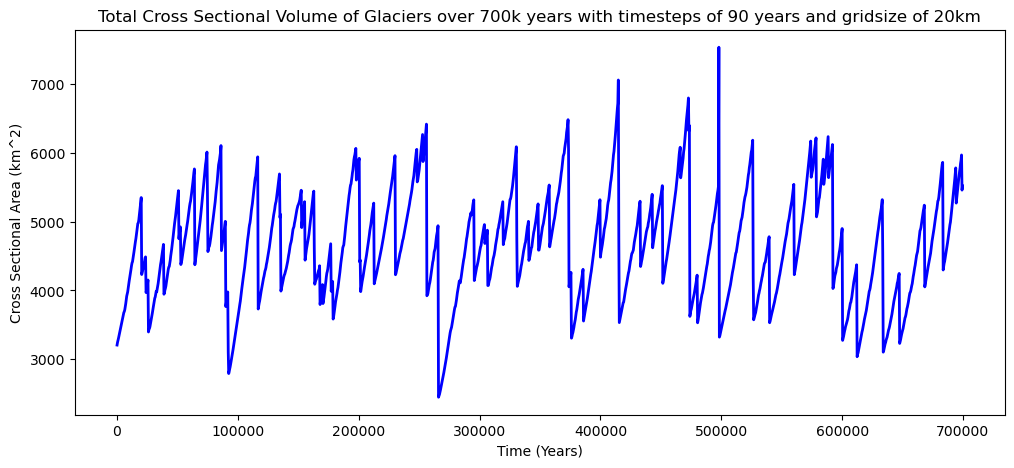

In [ ]:
# Showing ice cross seaction area with timesteps of 90 years and gridsize of 20
v2 = initialize(90, 20)
result2 = MainLoop(v2, 700000, 20)
all_time2 = result2['time']
saves2 = result2['save']
areas2 = result2['area']
plt.figure(figsize=(12, 5))
plt.xlabel('Time (Years)')
plt.ylabel('Cross Sectional Area (km^2)')
plt.title('Total Cross Sectional Volume of Glaciers over 700k years with timesteps of 90 years and gridsize of 20')
plt.plot(all_time2[:saves2], areas2[:saves2], 'b-', linewidth=2)
plt.show()

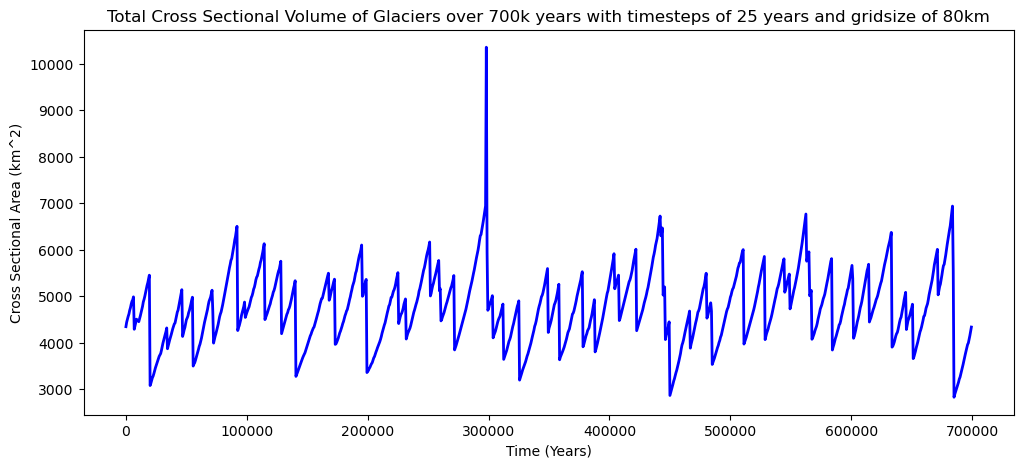

In [ ]:
# Showing ice cross seaction area with timesteps of 25 years and gridsize of 80
v3 = initialize(80, 25)
result3 = MainLoop(v3, 700000, 25)
all_time3 = result3['time']
saves3 = result3['save']
areas3 = result3['area']
plt.figure(figsize=(12, 5))
plt.xlabel('Time (Years)')
plt.ylabel('Cross Sectional Area (km^2)')
plt.title('Total Cross Sectional Volume of Glaciers over 700k years with timesteps of 25 years and gridsize of 80')
plt.plot(all_time3[:saves3], areas3[:saves3], 'b-', linewidth=2)
plt.show()

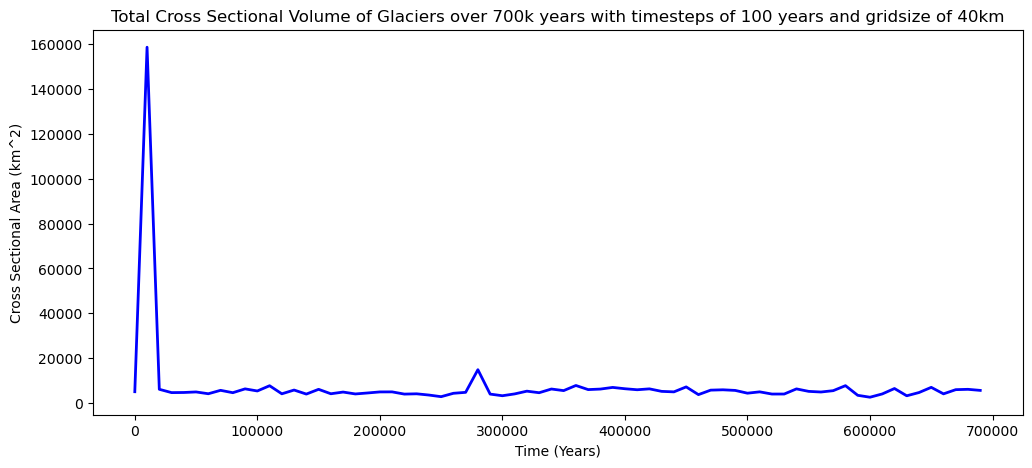

In [ ]:
# Showing ice cross seaction area with timesteps of 100 years and gridsize of 40
v4 = initialize(40, 100)
result4 = MainLoop(v4, 700000, 100)
all_time4 = result4['time']
saves4 = result4['save']
areas4 = result4['area']
plt.figure(figsize=(12, 5))
plt.xlabel('Time (Years)')
plt.ylabel('Cross Sectional Area (km^2)')
plt.title('Total Cross Sectional Volume of Glaciers over 700k years with timesteps of 100 years and gridsize of 40')
plt.plot(all_time4[:saves4], areas4[:saves4], 'b-', linewidth=2)
plt.show()

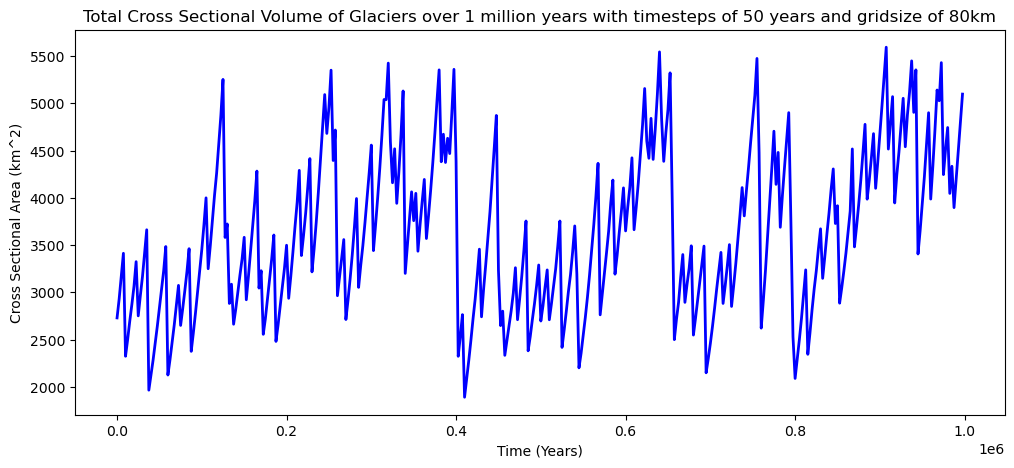

In [ ]:
# Showing ice cross seaction area with timesteps of 50 years and gridsize of 80
v5 = initialize(80, 50) # Test values from paper, 80 points and 50 year timesteps
result5 = MainLoop(v5, 1000000, 50)
all_time5 = result5['time']
saves5 = result5['save']
areas5 = result5['area']
plt.figure(figsize=(12, 5))
plt.xlabel('Time (Years)')
plt.ylabel('Cross Sectional Area (km^2)')
plt.title('Total Cross Sectional Volume of Glaciers over 1 million years with timesteps of 50 years and gridsize of 80')
plt.plot(all_time5[:saves5], areas5[:saves5], 'b-', linewidth=2)
plt.show()

C:\Users\Scott Rivenbark\AppData\Local\Temp\ipykernel_50476\3602025686.py:14: RuntimeWarning: overflow encountered in multiply
  diffuse = v['A'] * (h + noZeroMath) ** v['alpha'] * (np.abs(gradient) + noZeroMath) ** v['beta']
C:\Users\Scott Rivenbark\AppData\Local\Temp\ipykernel_50476\3036739669.py:4: RuntimeWarning: overflow encountered in matmul
  RHS = MR_Ice @ h + v['dt'] * G
C:\Users\Scott Rivenbark\AppData\Local\Temp\ipykernel_50476\3036739669.py:4: RuntimeWarning: invalid value encountered in matmul
  RHS = MR_Ice @ h + v['dt'] * G


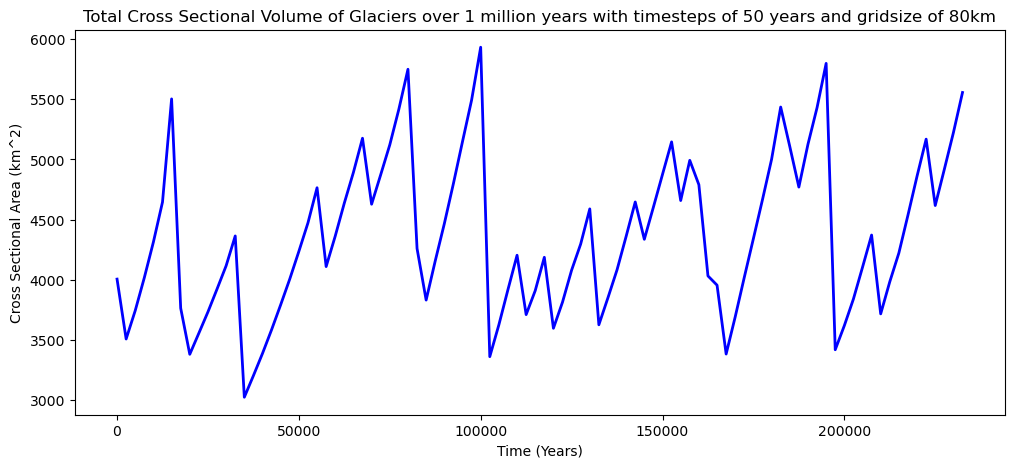

In [ ]:
# Showing ice cross seaction area with timesteps of 50 years and gridsize of 80
# THROWS AN ERROR, NUMERICALLY UNSTABLE, THIS IS ON PURPOSE
v6 = initialize(80, 50) # Test values from paper, 80 points and 50 year timesteps
result6 = MainLoop(v5, 5000000, 50)
all_time6 = result6['time']
saves6 = result6['save']
areas6 = result6['area']
plt.figure(figsize=(12, 5))
plt.xlabel('Time (Years)')
plt.ylabel('Cross Sectional Area (km^2)')
plt.title('Total Cross Sectional Volume of Glaciers over 1 million years with timesteps of 50 years and gridsize of 80')
plt.plot(all_time6[:saves6], areas6[:saves6], 'b-', linewidth=2)
plt.show()

References:
Modeling of the Northern Hemisphere ice sheets during the last glacial cycle and glaciological sensitivity - zweck - 2005 - journal of geophysical research: Atmospheres - wiley online library. (n.d.-c). https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2004JD005489

Ploskov, A. N., Eliseev, A. V., & Mokhov, I. I. (2024, April 21). Ensemble modeling of Ice Sheet Dynamics in the last glacial cycle - doklady earth sciences. SpringerLink. https://link.springer.com/article/10.1134/S1028334X23600172

Nature. (n.d.-d). https://www.nature.com/articles/137364a0.pdf?origin=ppub'
